# Graceful degradation 2 - Collision avoidance

In [108]:
using Plots
using Statistics

include("plotting_utils.jl");

Define the constant variables

In [109]:
const PATH =                  "/home/pbaldini/Desktop/2024.10-graceful_degradation/2025-03-19_experiment/ca"
const EPOCH_COUNT =           960
const SAFE_EPOCHS =           480
const SEEDS =                 1:83
const DISCARD_THRESHOLD =     600 # 600 È UN BUON RISULTATO
const MAX_EPOCH_PERFORMANCE = 1500;

Create a function for loading the experimental data from a file

In [110]:
load_experiment(seed, nature, damages) =
    read("$PATH/$nature/out/1-150/f$damages-s$seed.txt", String) |>
    s -> split(s, '\n') |>
    v -> filter(startswith('*'), v) |>
    v -> split.(v, '\t') |>
    v -> last.(v) |>
    v -> parse.(Float32, v);

Create a function for loading the experimental data with the given number of damages

In [113]:
load_experiment_set(t, n) = SEEDS |>
    s -> load_experiment.(s, t, n) |>
    v -> begin println("samples before filtering $(size(v, 1))"); v end |>
    #v -> filter(v -> maximum(v[begin+1:2:SAFE_EPOCHS]) > DISCARD_THRESHOLD, v) |>
    #v -> filter(v -> mean(v[begin+1:2:SAFE_EPOCHS]) > DISCARD_THRESHOLD, v) |>
    v -> begin println(collect(1:83)[map(v -> mean(v[SAFE_EPOCHS-25+1:2:SAFE_EPOCHS]) > DISCARD_THRESHOLD, v)]); v end |>
    v -> filter(v -> mean(v[SAFE_EPOCHS-25+1:2:SAFE_EPOCHS]) > DISCARD_THRESHOLD, v) |>
    v -> begin println("samples after filtering $(size(v, 1))"); v end;

Load all the experimental data

In [114]:
raw_data = Dict(
    :dmg_act_slowed =>       load_experiment_set.(:dmg_act_slowed, 0:2),
    :dmg_sns_disconnected => load_experiment_set.(:dmg_sns_disconnected, 0:3:24),
    :dmg_sns_fixed =>        load_experiment_set.(:dmg_sns_fixed, 0:3:24),
    :dmg_sns_random =>       load_experiment_set.(:dmg_sns_random, 0:3:24)
);

samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples before filtering 83
[4, 16, 30, 34, 51, 53, 54, 56, 59]
samples after filtering 9
samples be

Calculate the average performance of each experiment configuration (i.e., type of damage).
Consider only the "best" epochs (i.e., the epochs during which the best behavior is used).

In [115]:
avg_experiment(data) = data |> v -> map(mean, v) |> v -> getindex.(v, [2:2:EPOCH_COUNT])

avg_data = [ :dmg_act_slowed, :dmg_sns_disconnected, :dmg_sns_fixed, :dmg_sns_random ]
avg_data = avg_data |> v -> map(k -> k => avg_experiment(raw_data[k]), v) |> Dict;

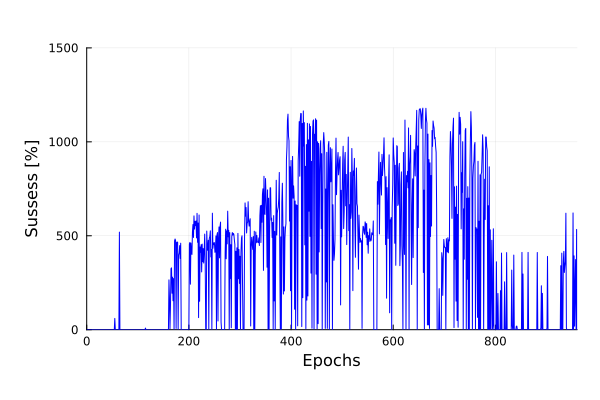

In [141]:
plot(raw_data[:dmg_sns_disconnected][1][9], ylim=(0,1500))

Calculate the percentage of replicas reaching a performance of at least 600 during each phase of the experiment

In [89]:
rld(data::Vector{Float32}) = 1:length(data) .|> i -> any(e -> e > 600, data[begin:i])
rld(data::Vector{Vector{Float32}}) = rld.(data) |> v -> +(v...) / length(v)

rld_data_complete = [ :dmg_act_slowed, :dmg_sns_disconnected, :dmg_sns_fixed, :dmg_sns_random ]
rld_data_complete = rld_data_complete |> v -> map(k -> k => rld.(raw_data[k]), v) |> Dict;

In [90]:
rld(data::Vector{Vector{Float32}}) = data |> v -> map(v -> vcat(rld(v[begin:EPOCH_COUNT ÷ 2]), rld(v[EPOCH_COUNT ÷ 2 + 1:end])), v) |> v -> +(v...) / length(v)

rld_data_phases = [ :dmg_act_slowed, :dmg_sns_disconnected, :dmg_sns_fixed, :dmg_sns_random ]
rld_data_phases = rld_data_phases |> v -> map(k -> k => rld.(raw_data[k]), v) |> Dict;

## 1 Best-controllers performance analysis

Define the default plot parameters

In [91]:
Plots.default(
    # lines
    color=:blue,
    label=nothing,

    # axes
    xlabel="Epochs",
    xlim=(0, EPOCH_COUNT ÷ 2),
    ylabel="Performance [AVG]",
    ylim=(0, 1050) .+ (-10, 10),

    # fig properties
    margins=15Plots.px,
    top_margin=40Plots.px,
    left_margin=25Plots.px,
    bottom_margin=30Plots.px,

    # legend
    legend=:topleft
);

In [92]:
zip(raw_data[:dmg_sns_fixed][1][1][480:end], raw_data[:dmg_sns_disconnected][1][1][480:end]) |> collect

481-element Vector{Tuple{Float32, Float32}}:
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (1085.1426, 1085.1426)
 (0.0, 0.0)
 (609.4886, 609.4886)
 ⋮
 (19.132376, 19.132376)
 (377.3433, 377.3433)
 (552.717, 552.717)
 (288.76343, 288.76343)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)
 (0.0, 0.0)

### 1.1 Slowed actuators

Create the plot

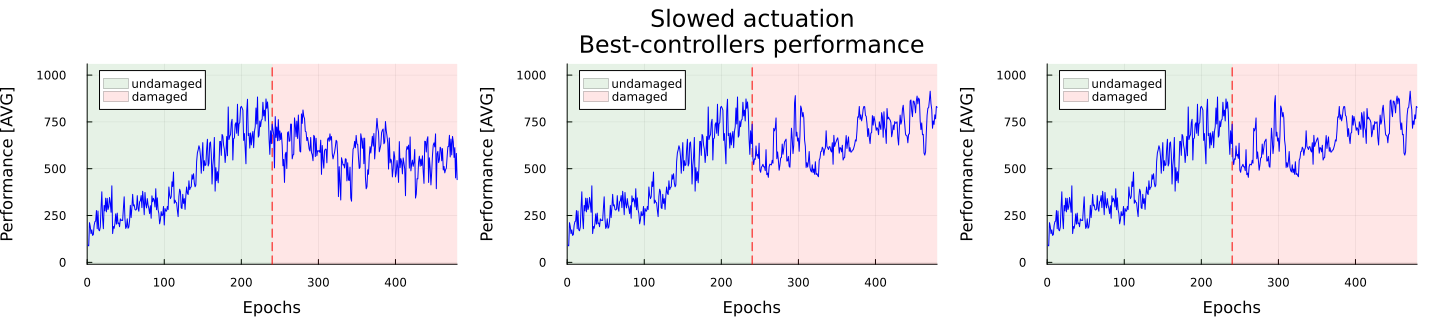

In [93]:
ccount = length(avg_data[:dmg_act_slowed]) ÷ 3
plot(suptitle="Slowed actuation\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(avg_data[:dmg_act_slowed]), SAFE_EPOCHS ÷ 2)
plot!(size=(3 * 480, ccount * 320))

### 1.2 Disconnected sensors

Create the plot

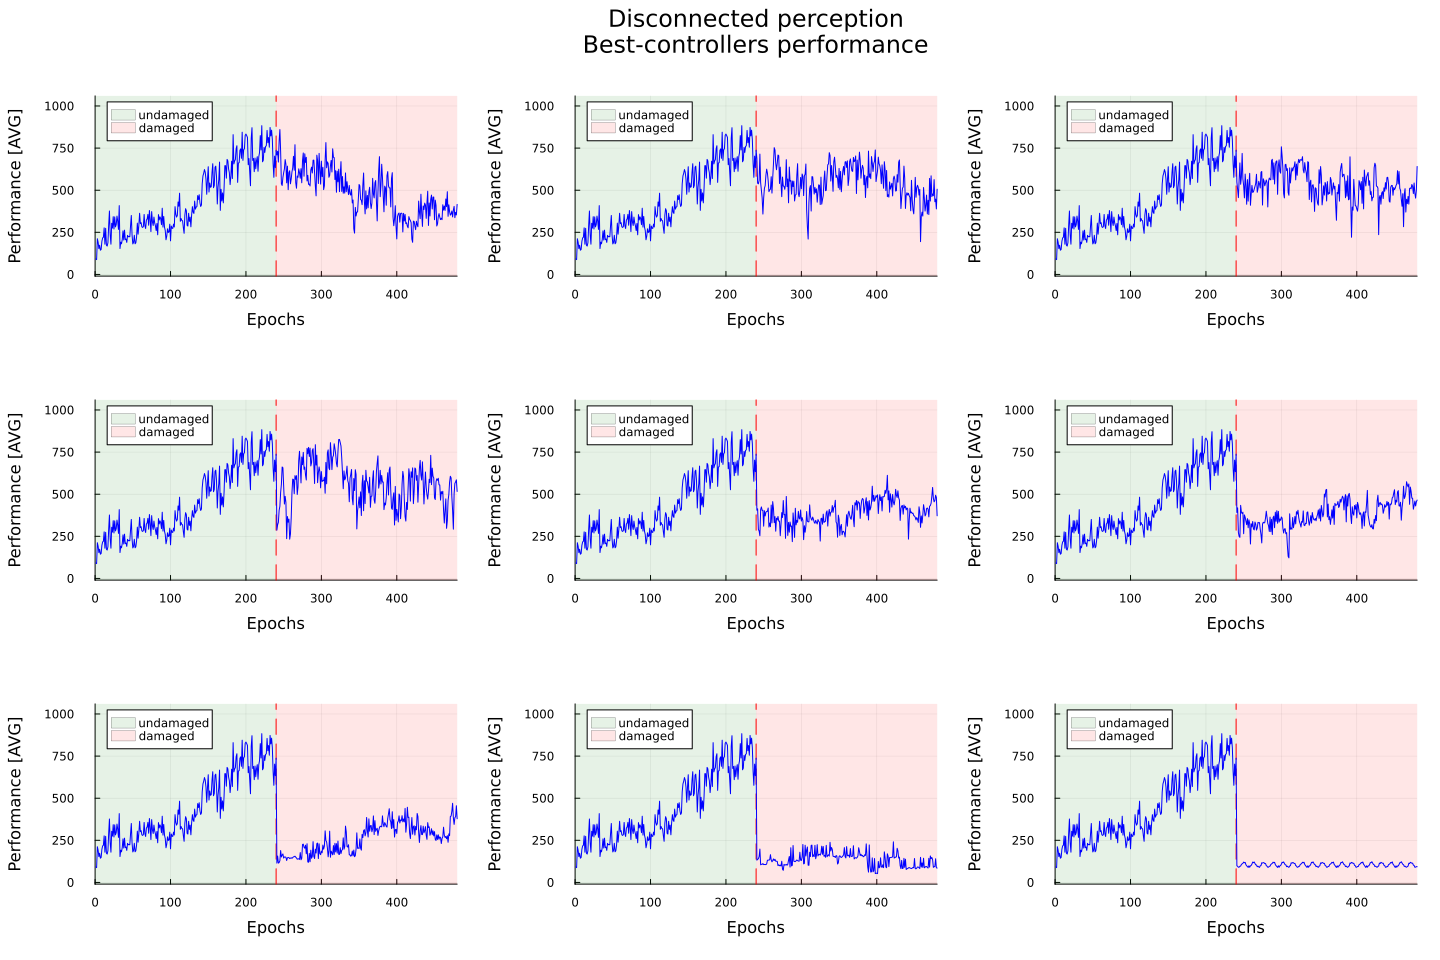

In [94]:
ccount = length(avg_data[:dmg_sns_disconnected]) ÷ 3
plot(suptitle="Disconnected perception\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(avg_data[:dmg_sns_disconnected]), SAFE_EPOCHS ÷ 2)
plot!(size=(3 * 480, ccount * 320))

### 1.3 Fixed sensors

Create the plot

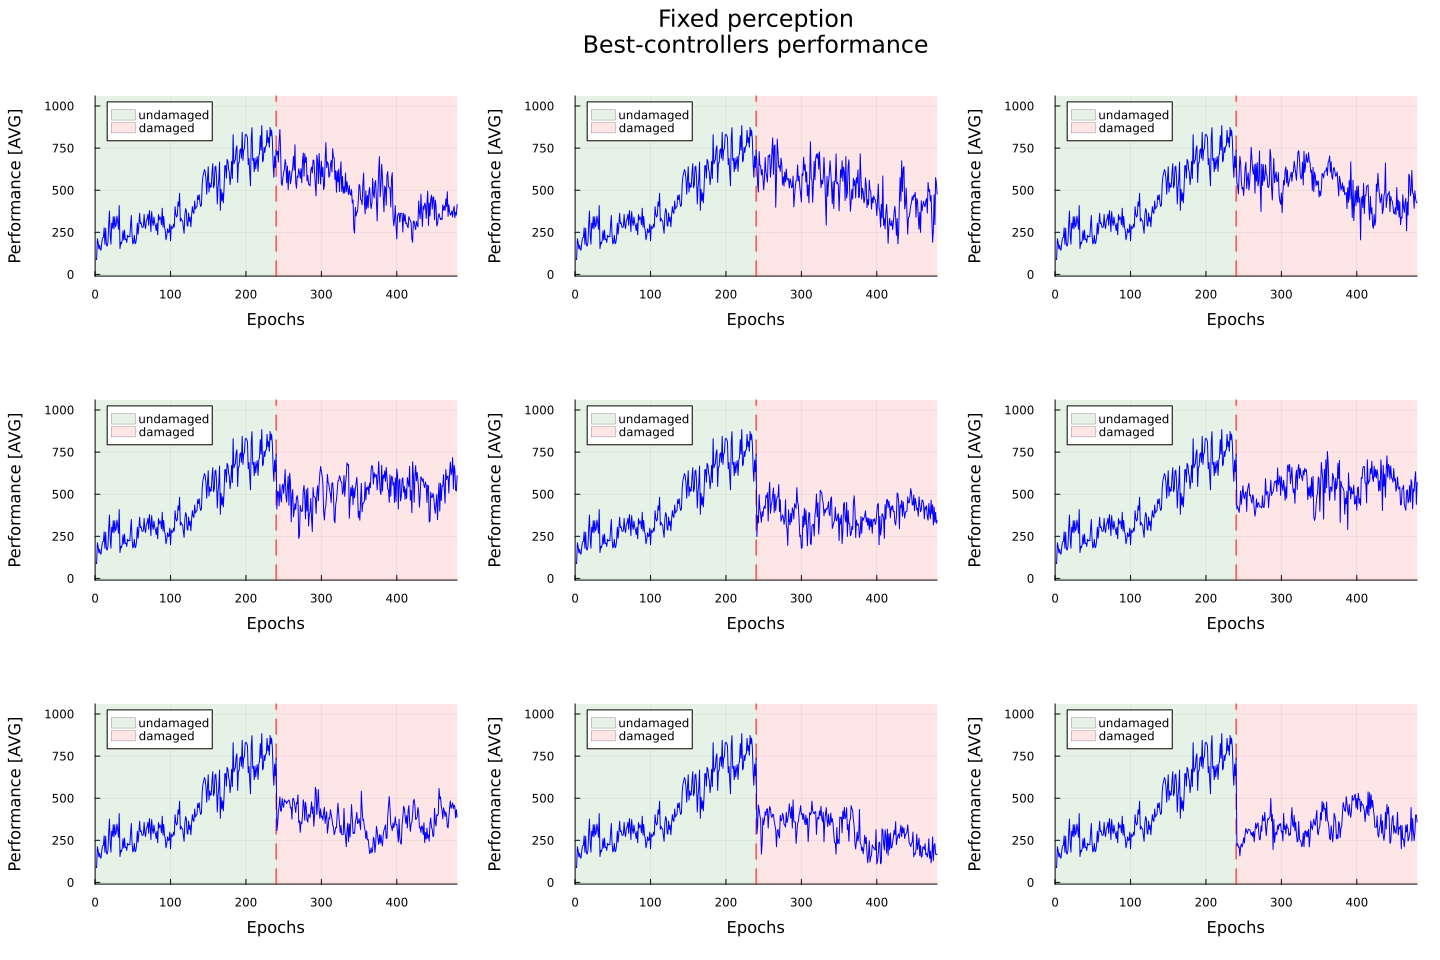

In [95]:
ccount = length(avg_data[:dmg_sns_fixed]) ÷ 3
plot(suptitle="Fixed perception\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(avg_data[:dmg_sns_fixed]), SAFE_EPOCHS ÷ 2)
plot!(size=(3 * 480, ccount * 320))

### 1.4 Random sensors

Create the plot

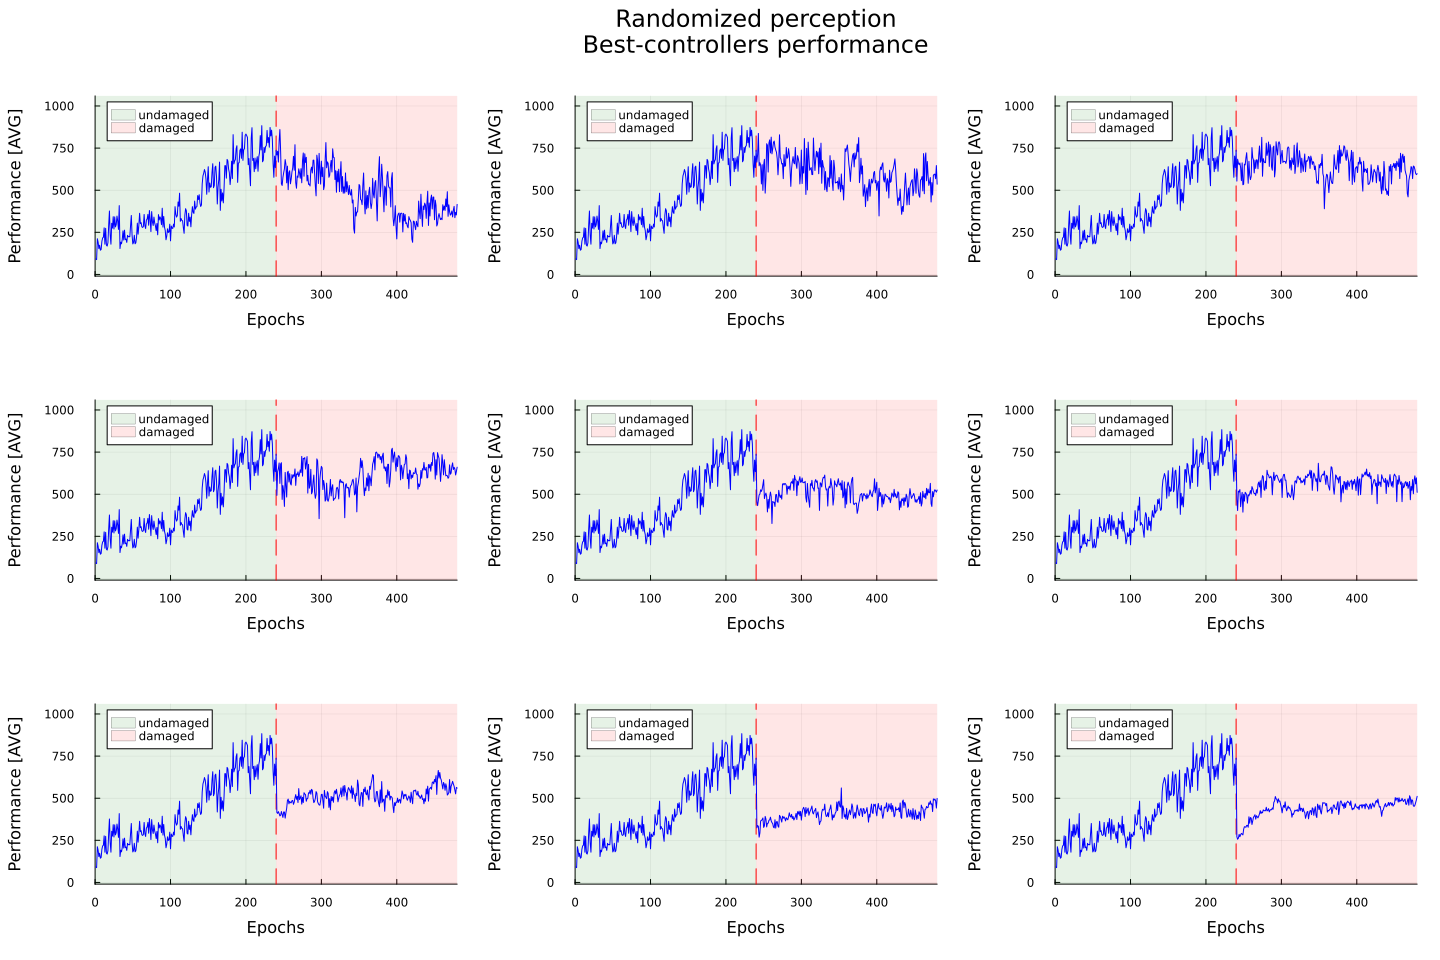

In [96]:
ccount = length(avg_data[:dmg_sns_random]) ÷ 3
plot(suptitle="Randomized perception\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(avg_data[:dmg_sns_random]), SAFE_EPOCHS ÷ 2)
plot!(size=(3 * 480, ccount * 320))

## 2 Run length distribution

Define the default plot parameters

In [97]:
Plots.default(
    # lines
    label=nothing,

    # axes
    xlim=(0, EPOCH_COUNT),
    xlabel="Epochs",
    ylim=(0, 1) .+ (-0.05, 0.05),
    ylabel="Sussess [%]",

    # fig properties
    margins=15Plots.px,
    top_margin=40Plots.px,
    left_margin=25Plots.px,
    bottom_margin=30Plots.px,

    # legend
    legend=:bottomright
);

### 2.1 Slowed actuators

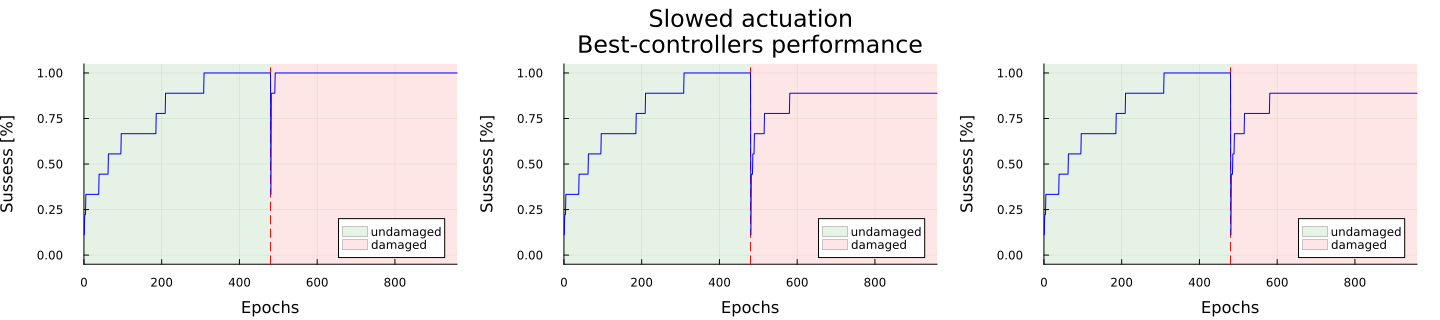

In [98]:
ccount = length(rld_data_phases[:dmg_act_slowed]) ÷ 3
plot(suptitle="Slowed actuation\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(rld_data_phases[:dmg_act_slowed]), SAFE_EPOCHS)
plot!(size=(3 * 480, ccount * 320))

## 2.1 Run length distribution - Disconnected sensors

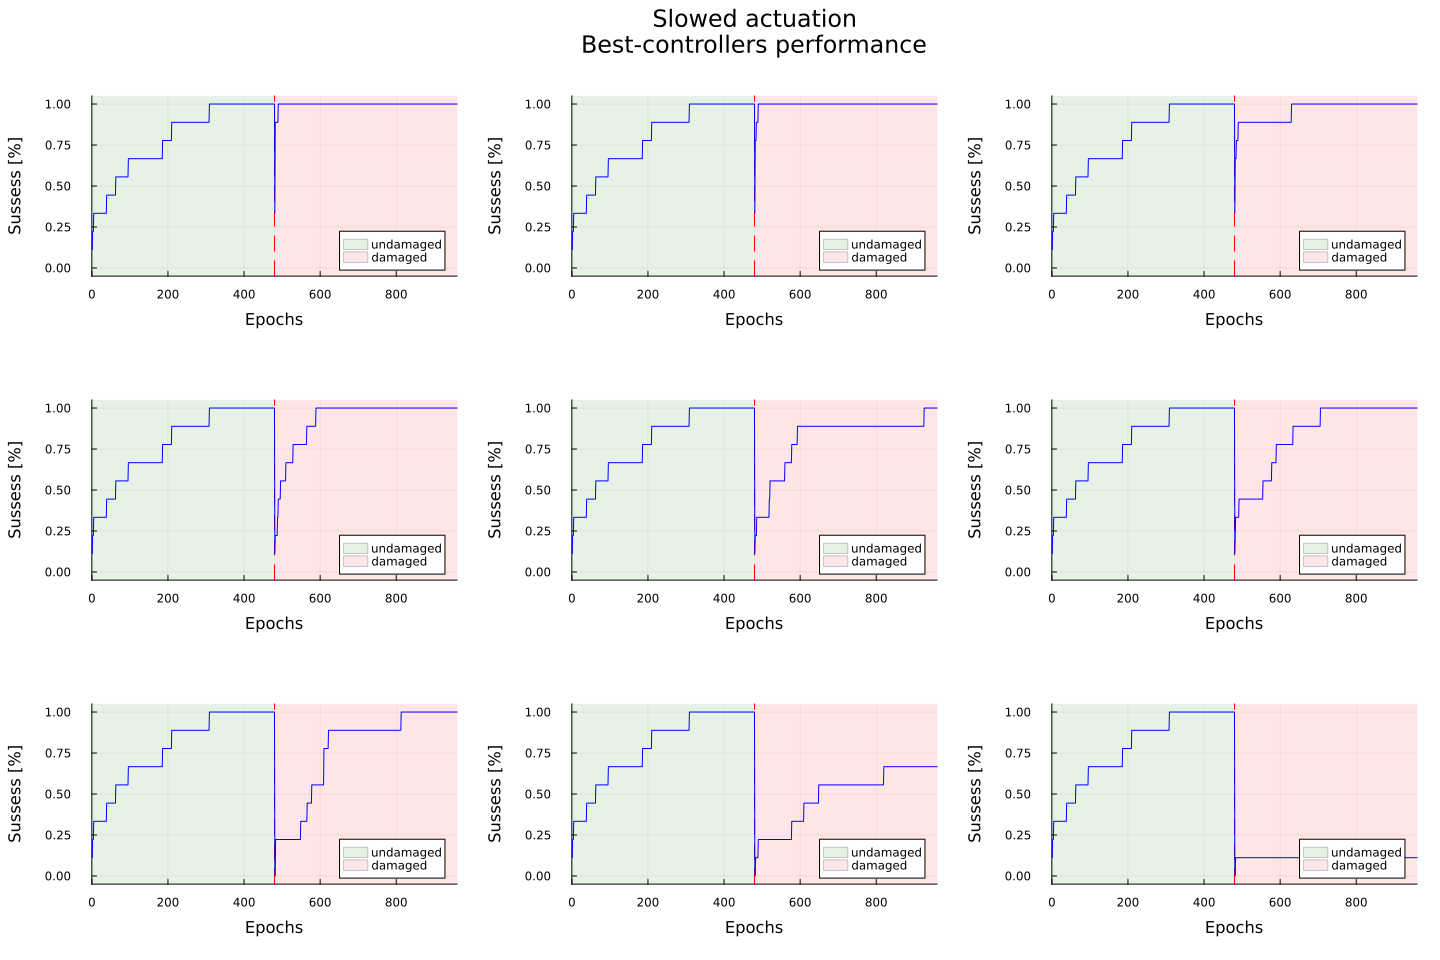

In [99]:
ccount = length(rld_data_phases[:dmg_sns_disconnected]) ÷ 3
plot(suptitle="Slowed actuation\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(rld_data_phases[:dmg_sns_disconnected]), SAFE_EPOCHS)
plot!(size=(3 * 480, ccount * 320))

## 2.1 Run length distribution - Fixed sensors

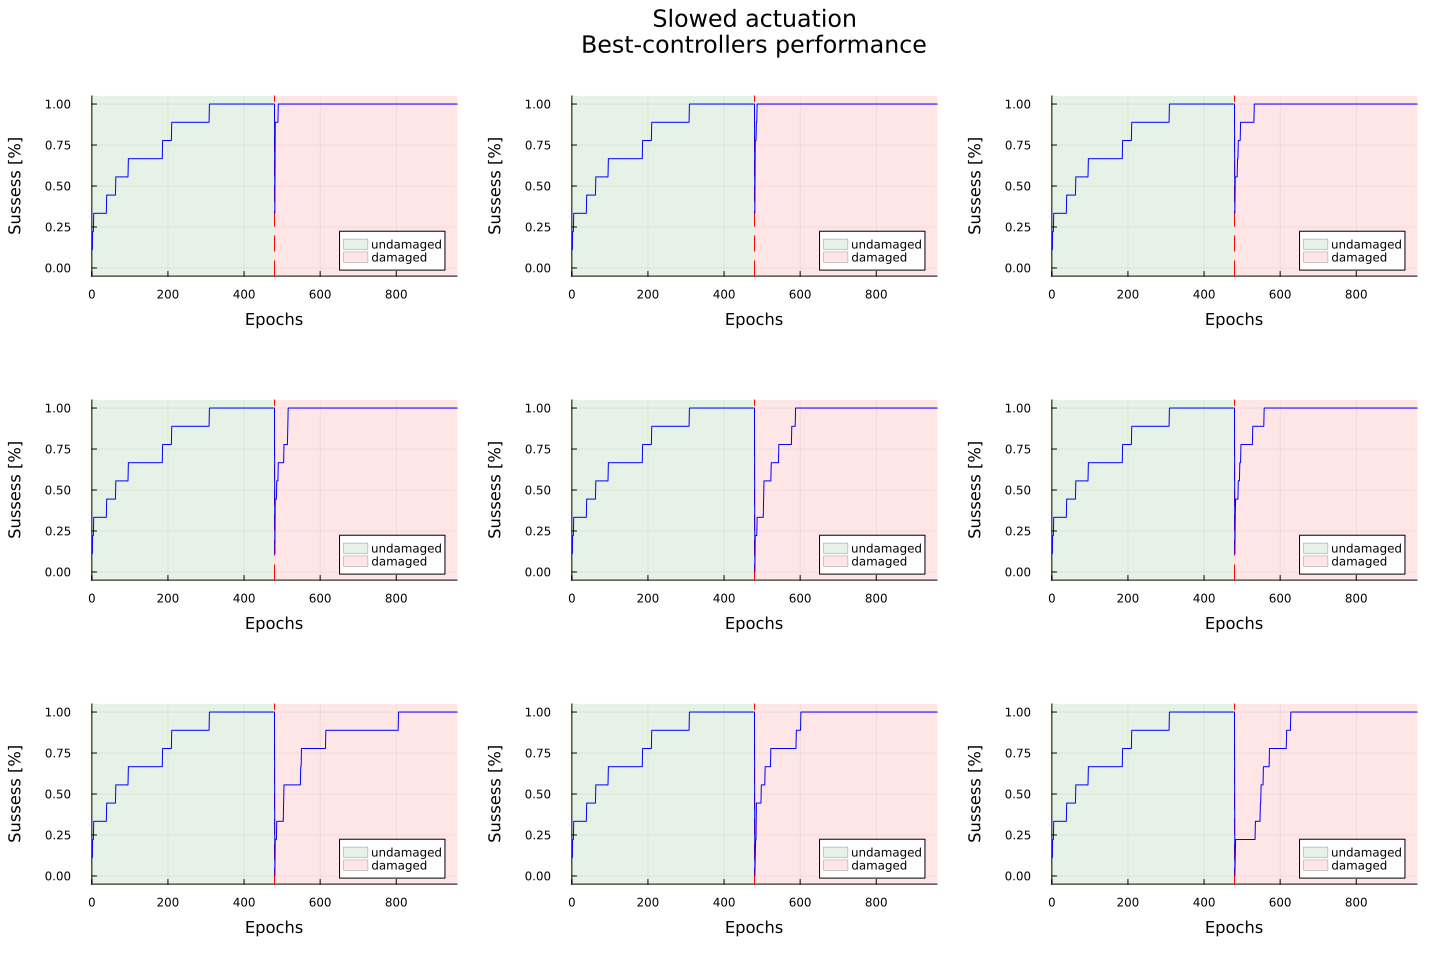

In [100]:
ccount = length(rld_data_phases[:dmg_sns_fixed]) ÷ 3
plot(suptitle="Slowed actuation\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(rld_data_phases[:dmg_sns_fixed]), SAFE_EPOCHS)
plot!(size=(3 * 480, ccount * 320))

## 2.1 Run length distribution - Random sensors

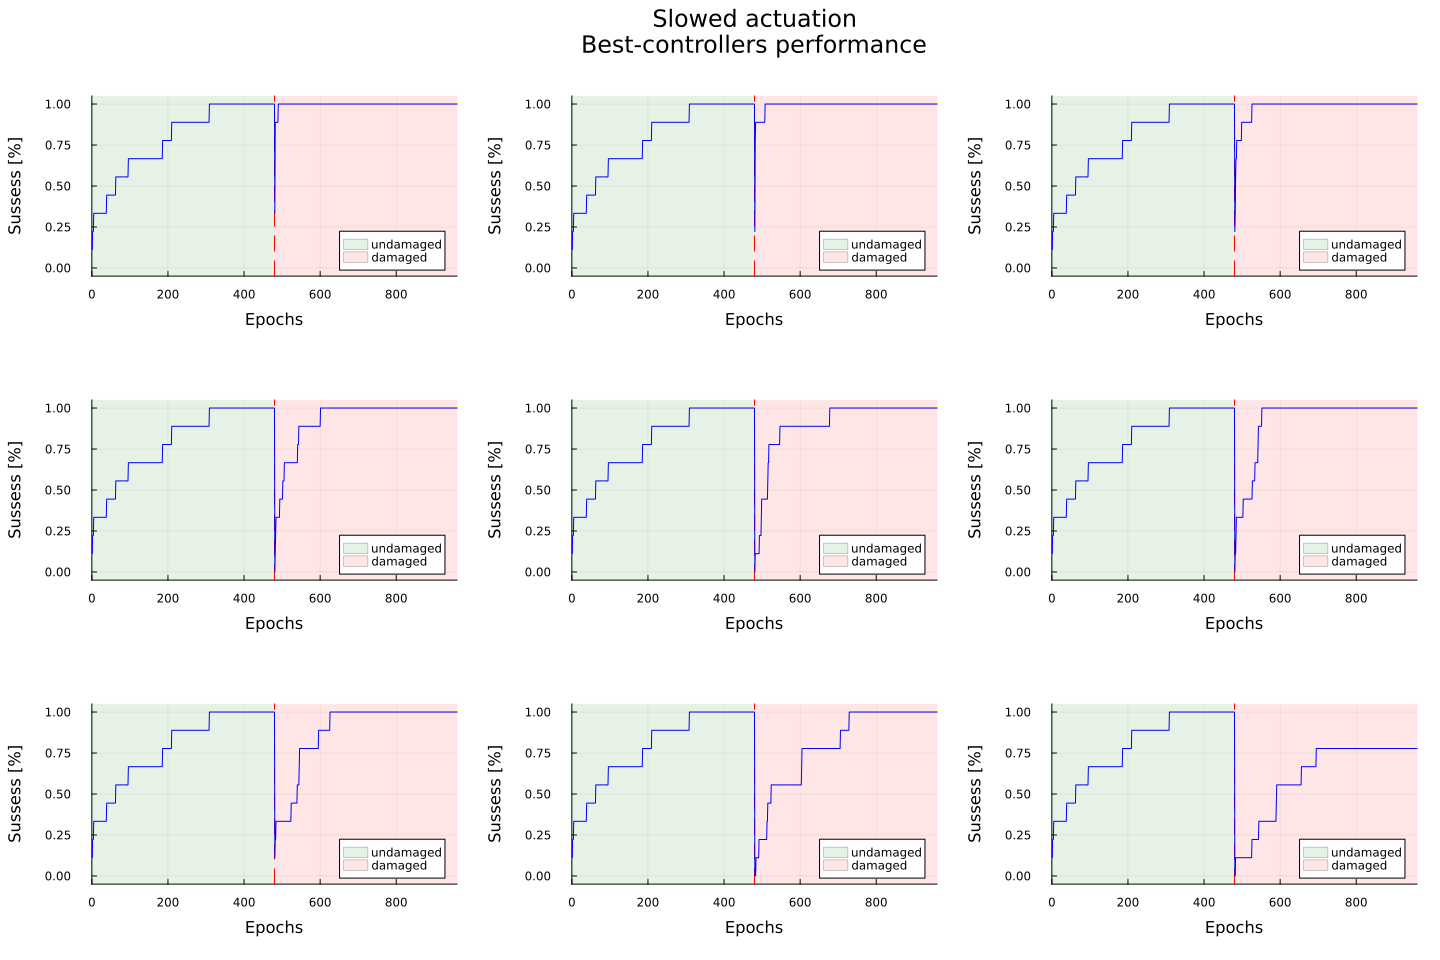

In [101]:
ccount = length(rld_data_phases[:dmg_sns_random]) ÷ 3
plot(suptitle="Slowed actuation\nBest-controllers performance", layout=(ccount, 3))
subplot.(enumerate(rld_data_phases[:dmg_sns_random]), SAFE_EPOCHS)
plot!(size=(3 * 480, ccount * 320))